# Investigating walmart forecasting dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#show the percentage of the NaN values
df.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [4]:
#make a copy of the data after dropping 
after_drop = df.drop(["Outlet_Identifier",'Outlet_Location_Type','Outlet_Type'],axis=1)
after_drop.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,994.7052


In [5]:
# filling the continuous values by the mean

after_drop['Item_Weight'].fillna(after_drop['Item_Weight'].mean(),inplace=True)
after_drop['Item_Visibility'].fillna(after_drop['Item_Visibility'].mean(),inplace=True)
after_drop['Item_MRP'].fillna(after_drop['Item_MRP'].mean(),inplace=True)
after_drop['Item_Outlet_Sales'].fillna(after_drop['Item_Outlet_Sales'].mean(),inplace=True)
after_drop.dropna(axis=0,how='any',inplace=True)


In [6]:
after_drop.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Establishment_Year    False
Outlet_Size                  False
Item_Outlet_Sales            False
dtype: bool

## what is correlation of the data?

In [7]:
#numerically
after_drop.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.008526,0.029214,-0.004779,0.008007
Item_Visibility,-0.008526,1.000000,-0.000651,-0.087452,-0.105854
Item_MRP,0.029214,-0.000651,1.000000,0.011632,0.588939
Outlet_Establishment_Year,-0.004779,-0.087452,0.011632,1.000000,-0.057850
Item_Outlet_Sales,0.008007,-0.105854,0.588939,-0.057850,1.000000


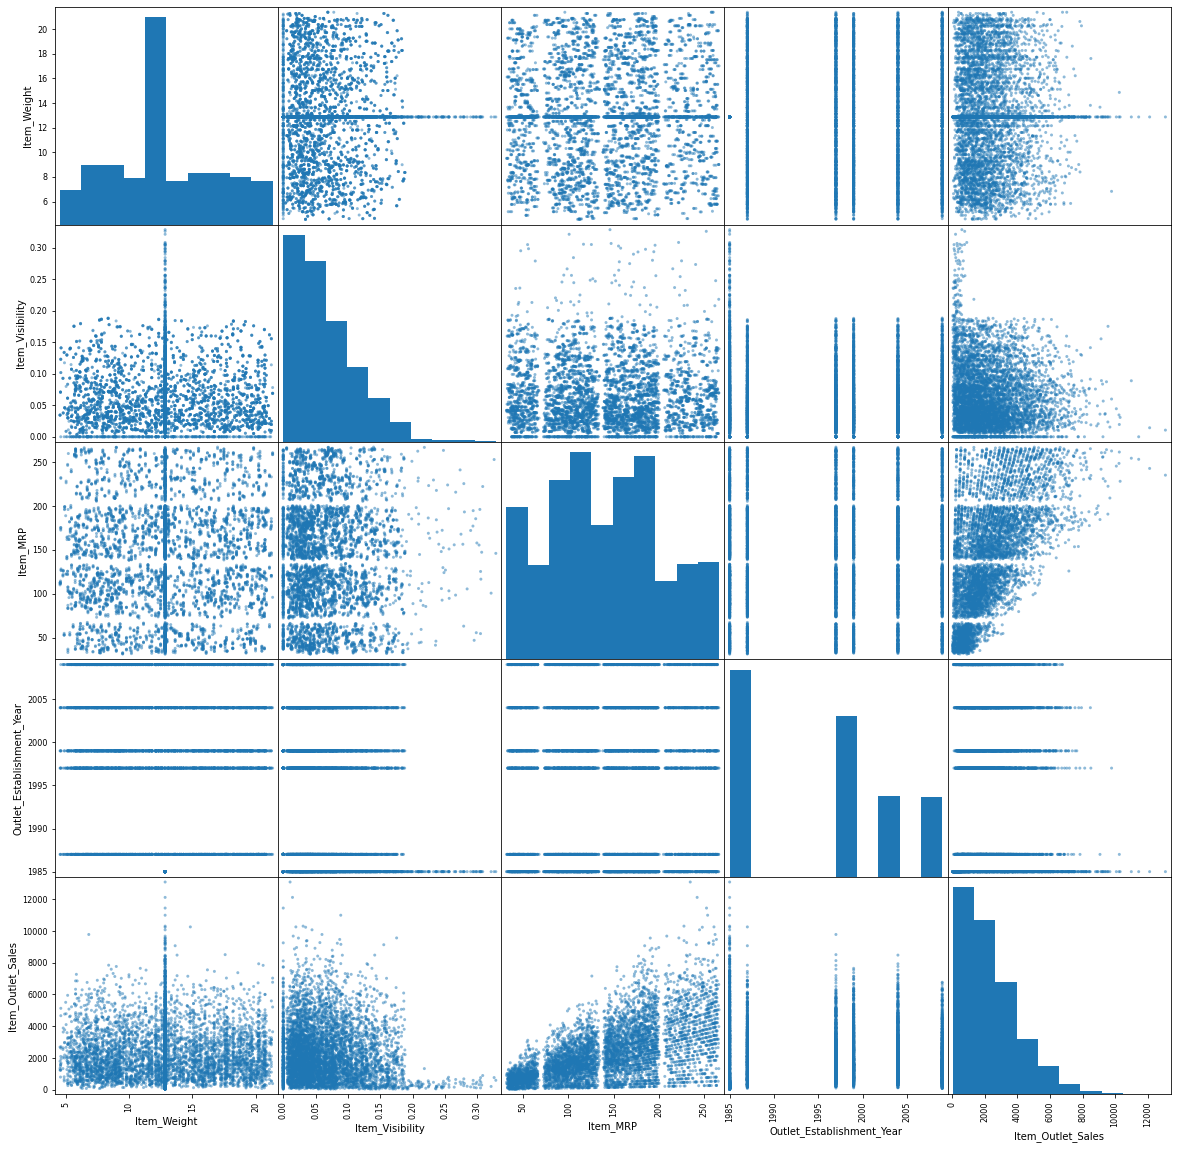

In [8]:
#by plotting and showing distributions
pd.plotting.scatter_matrix(after_drop,figsize=(20,20));

## what is the relation between MRP and Item_Outlet_Sales?

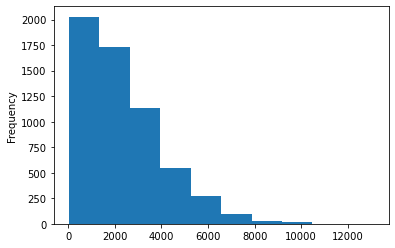

In [9]:
after_drop.groupby(["Item_MRP","Outlet_Establishment_Year"])["Item_Outlet_Sales"].mean().plot(kind="hist");
#skewed to the right (decreased by years)

In [10]:
after_drop["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [11]:
after_drop["Item_Fat_Content"].replace('low fat','Low Fat',inplace=True)
after_drop["Item_Fat_Content"].replace('LF','Low Fat',inplace=True)
after_drop["Item_Fat_Content"].replace('reg','Regular',inplace=True)

after_drop["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

## how item fat content affecats item outlet sales?

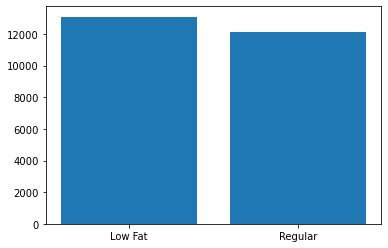

In [12]:
plt.bar(after_drop["Item_Fat_Content"],after_drop["Item_Outlet_Sales"]);
# Reguler is the highest value 

## what is the most sales Tier?

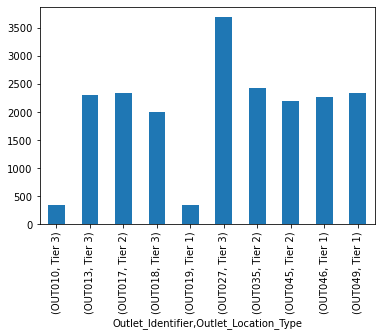

In [13]:
df.groupby(["Outlet_Identifier","Outlet_Location_Type"])["Item_Outlet_Sales"].mean().plot(kind="bar");

## * what is the most sales products in 1998 (lowest profit year)?

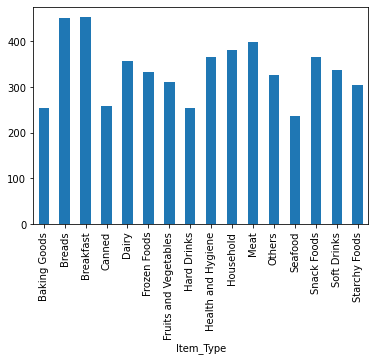

In [14]:
df_1998 = df.query('Outlet_Establishment_Year == 1998')
df_1998.groupby("Item_Type")["Item_Outlet_Sales"].mean().plot(kind="bar");

## * In what year was the most item weight sold?

(12.4, 13.4)

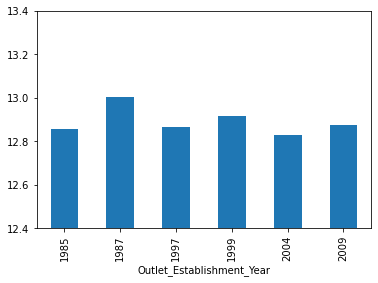

In [15]:
after_drop.groupby("Outlet_Establishment_Year")["Item_Weight"].mean().plot(kind="bar");
plt.ylim([12.4,13.4])
#year 1987 had the maximum profit gained by the item weight

C:\Users\zd\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\zd\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


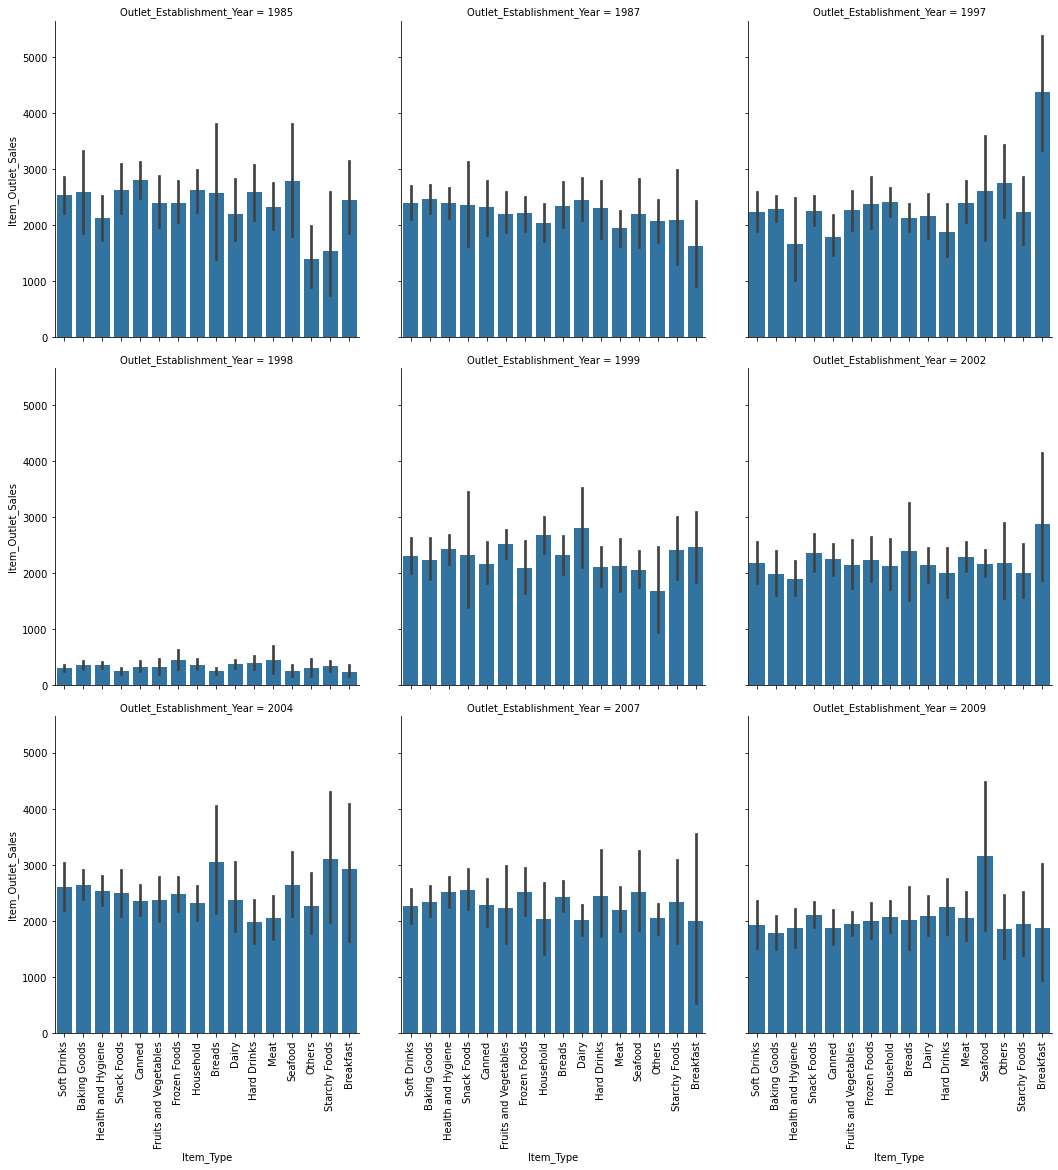

In [16]:
g = sns.FacetGrid(df, col="Outlet_Establishment_Year",col_wrap=3,size=5,sharex=True)
g.map(sns.barplot, "Item_Type", "Item_Outlet_Sales");
g.set_xticklabels(rotation = 90)
